# Opencv Basics


In [27]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

---


In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

## 1 - Loading and Displaying Images

[Reference](https://pyimagesearch.com/2021/01/20/opencv-load-image-cv2-imread/?_ga=2.114802688.608670271.1656952021-258974203.1656952021)

- For loading any images, you need to bring those images into the memory first.
- Anytime you see these None or NoneType errors, your first step in diagnosing and resolving them is to investigate whether your image was successfully read from disk correctly. 99% of the time the error is due to your code assuming a valid image, but in fact the image was not properly read from disk!

In [22]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#    help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "neeraj.jpg",
}

In [23]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 800 pixels
height: 800  pixels
channels: 3


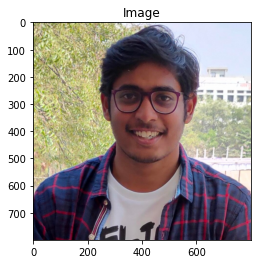

True

In [24]:
# show the image and wait for a keypress
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("newimage.jpg", image)

## 2 -  Opencv Getting and setting pixels

[Reference](https://pyimagesearch.com/2021/01/20/opencv-getting-and-setting-pixels/)

- Images are made up of pixels, the lower the value to zero of pixel, the close it is to black color.
- Images are simply NumPy arrays, with the origin (0, 0) located at the top-left of the image.
- Images are generally expressed in RGB Order, when opencv was developed BGR was the order so that why it is BGR ordering is the norm in OpenCV.
- height = no of rows, width = no of columns Image[y,x].
- Image = (height, width, no of channels)
- 

In [14]:
args = {
    "image": "neeraj.jpg"
}

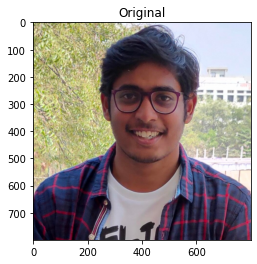

In [15]:
# load the image, grab its spatial dimensions (width and height),
# and then display the original image to our screen
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [16]:

(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 138, Green: 138, Blue: 84
Pixel at (50, 20) - Red: 175, Green: 175, Blue: 111
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


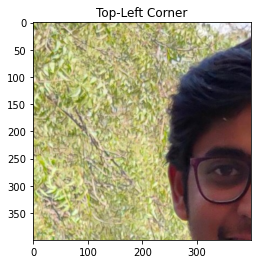

In [17]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

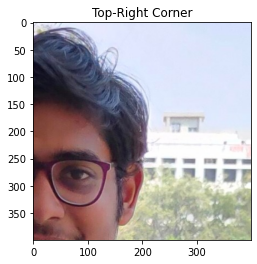

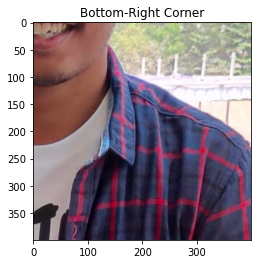

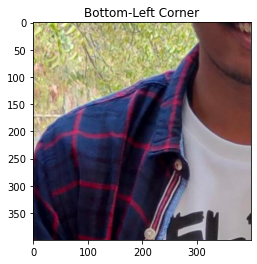

In [18]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

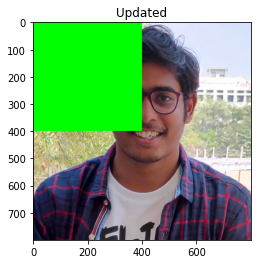

In [19]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

## 3 -  Drawing with OpenCV

[Reference](https://pyimagesearch.com/2021/01/27/drawing-with-opencv/) 
- 

In [28]:
# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

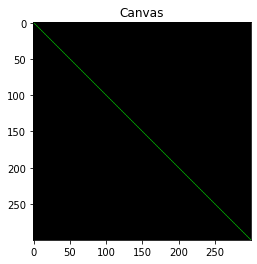

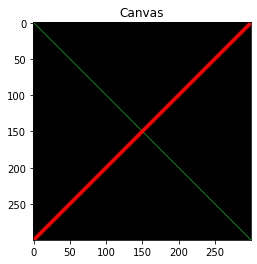

In [29]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

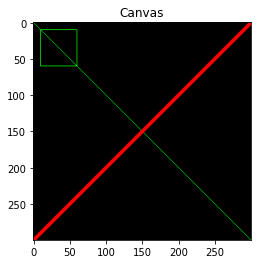

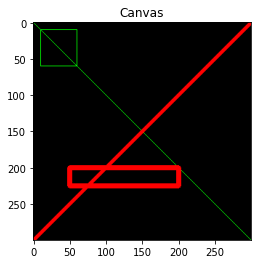

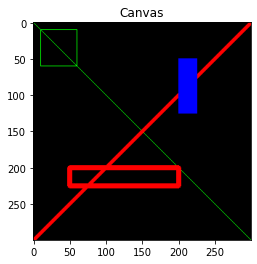

In [30]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

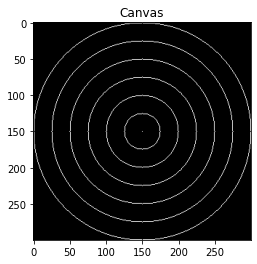

In [31]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
    # draw a white circle with the current radius size
    cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

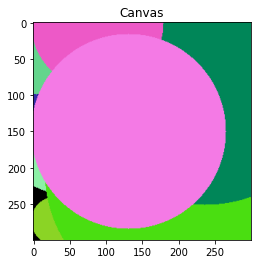

In [33]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our  screen
plt_imshow("Canvas", canvas)

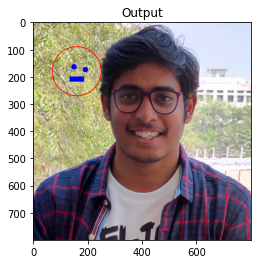

In [38]:
# load the input image from disk
image = cv2.imread(args["image"])

# draw a circle around my face, two filled in circles covering my
# eyes, and a rectangle over top of my mouth
cv2.circle(image, (160, 180), 90, (0, 0, 255), 2)
cv2.circle(image, (150, 164), 10, (255, 0, 0), -1)
cv2.circle(image, (192, 174), 10, (255, 0, 0), -1)
cv2.rectangle(image, (134, 200), (186, 218), (255, 0, 0), -1)

# show the output image
plt_imshow("Output", image)